In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS').getOrCreate()

In [2]:
import pandas as pd

In [3]:
df = spark.read.csv('Datasets/train.csv',inferSchema=True,header=True)

In [4]:
#2.3	Explore the data

print((df.count(), len(df.columns)))

(9557, 143)


In [4]:
boolean_show = df.select(df.columns[40:50]).show(10)
boolean_show

+---------+---------+---------------+--------------+-----------+------+-------+------+-------+----------+
|techootro|cielorazo|abastaguadentro|abastaguafuera|abastaguano|public|planpri|noelec|coopele|sanitario1|
+---------+---------+---------------+--------------+-----------+------+-------+------+-------+----------+
|        0|        1|              1|             0|          0|     1|      0|     0|      0|         0|
|        0|        1|              1|             0|          0|     1|      0|     0|      0|         0|
|        0|        1|              1|             0|          0|     1|      0|     0|      0|         0|
|        0|        1|              1|             0|          0|     1|      0|     0|      0|         0|
|        0|        1|              1|             0|          0|     1|      0|     0|      0|         0|
|        0|        1|              1|             0|          0|     1|      0|     0|      0|         0|
|        0|        1|              1|         

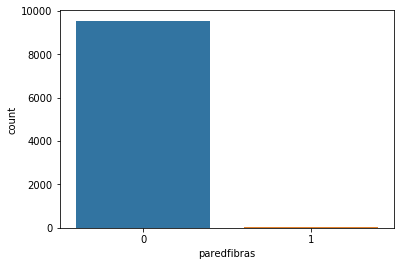

In [7]:
import seaborn as sns

sns.countplot("paredfibras",data=df.toPandas())

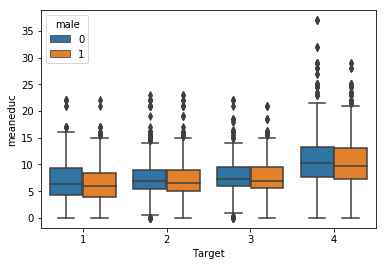

In [8]:
sns.boxplot(x = 'Target', y = 'meaneduc', hue='male', data = df.toPandas())

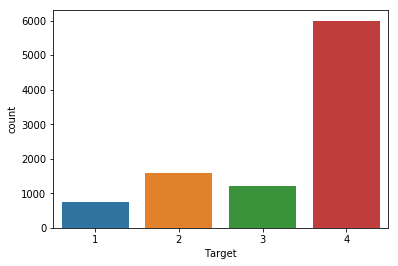

In [9]:
sns.countplot("Target", data=df.toPandas())

In [10]:
df.filter(df.idhogar == '0172ab1d9').select('idhogar', 'Id', 'parentesco1', 'Target').show()

+---------+------------+-----------+------+
|  idhogar|          Id|parentesco1|Target|
+---------+------------+-----------+------+
|0172ab1d9|ID_a5e2b0639|          0|     3|
|0172ab1d9|ID_5dfdf4ebe|          0|     2|
|0172ab1d9|ID_762e1fd96|          0|     3|
|0172ab1d9|ID_c76b87004|          1|     3|
|0172ab1d9|ID_1dffe3dcf|          0|     2|
+---------+------------+-----------+------+



In [11]:
columnList = [item[0] for item in df.dtypes if item[1].startswith('string')]
df.select(columnList).show()

+------------+---------+----------+------+------+
|          Id|  idhogar|dependency|edjefe|edjefa|
+------------+---------+----------+------+------+
|ID_279628684|21eb7fcc1|        no|    10|    no|
|ID_f29eb3ddd|0e5d7a658|         8|    12|    no|
|ID_68de51c94|2c7317ea8|         8|    no|    11|
|ID_d671db89c|2b58d945f|       yes|    11|    no|
|ID_d56d6f5f5|2b58d945f|       yes|    11|    no|
|ID_ec05b1a7b|2b58d945f|       yes|    11|    no|
|ID_e9e0c1100|2b58d945f|       yes|    11|    no|
|ID_3e04e571e|d6dae86b7|       yes|     9|    no|
|ID_1284f8aad|d6dae86b7|       yes|     9|    no|
|ID_51f52fdd2|d6dae86b7|       yes|     9|    no|
|ID_db44f5c59|d6dae86b7|       yes|     9|    no|
|ID_de822510c|bb2094100|       yes|    no|    11|
|ID_d94071d7c|bb2094100|       yes|    no|    11|
|ID_064b57869|c51f9c774|       yes|    no|     4|
|ID_5c837d8a4|c51f9c774|       yes|    no|     4|
|ID_0a39e419e|6893e65ca|         3|    no|    10|
|ID_4ff51f90c|6893e65ca|         3|    no|    10|


In [12]:
from pyspark.sql.functions import isnull, when, count, col
nacounts = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()
nacounts


+---+----+------+-----+------+----+------+----+-----+----+----+----+----+----+----+----+----+----+------+------+--------+-------+------+-----------+-----------+---------+--------+--------+---------+-----------+----------+----------+-----------+---------+---------+-----------+----------+---------+--------------+---------+---------+---------+---------------+--------------+-----------+------+-------+------+-------+----------+----------+----------+----------+----------+-------------+-------------+-------------+-------------+---------+---------+---------+---------+---------+---------+-------+-------+-------+-------+-------+-------+-----+-----+-----+---+----+------+------------+------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+-------+---------+----------+-----------+-----------+----------+------+------+--------+-------

In [13]:
edjefe_count = df.groupBy('edjefe').count().show()
edjefe_count

+------+-----+
|edjefe|count|
+------+-----+
|     7|  234|
|    15|  285|
|    11|  751|
|     3|  307|
|     8|  257|
|    16|  134|
|     5|  222|
|    18|   19|
|    17|  202|
|     6| 1845|
|    19|   14|
|     9|  486|
|    no| 3762|
|    20|    7|
|    10|  111|
|   yes|  123|
|     4|  137|
|    12|  113|
|    13|  103|
|    14|  208|
+------+-----+
only showing top 20 rows



In [5]:
#3.1	Select data

# Get the count for each idhogar
idhogar_count = df.groupBy('idhogar').count().sort("count", ascending=False)
idhogar_count.show()

+---------+-----+
|  idhogar|count|
+---------+-----+
|fd8a6d014|   13|
|0c7436de6|   12|
|ae6cf0558|   12|
|3fe29a56b|   11|
|4476ccd4c|   11|
|6b35cdcf0|   11|
|b7a0b59d7|   11|
|63f11d6ea|   10|
|a18c0c0be|   10|
|f2a4cd356|   10|
|0fc6c05f7|   10|
|7cad2d6c4|   10|
|6a96a96c0|   10|
|322cefd2f|    9|
|476b3f2ee|    9|
|ae489f548|    9|
|efec7e82c|    9|
|06ca88023|    9|
|d43a04997|    9|
|9fd143d1f|    9|
+---------+-----+
only showing top 20 rows



In [6]:
## merge the count as a column to dataset for the filter later

df31 = df.join(idhogar_count, on='idhogar', how ='inner')
print((df31.count(), len(df31.columns)))

(9557, 144)


In [7]:
## filter the data with count over 8

df31 = df31.filter('count < 8')
df31.groupBy('idhogar').count().sort("count", ascending=False).show(10)

+---------+-----+
|  idhogar|count|
+---------+-----+
|b83dfb5a3|    7|
|695bc249d|    7|
|1f89d80f0|    7|
|19949f9d0|    7|
|d83d94ba0|    7|
|49ae51a36|    7|
|d4bce9879|    7|
|af5a4dc40|    7|
|b8618998c|    7|
|0592dc939|    7|
+---------+-----+
only showing top 10 rows



In [8]:
## delect useless columns

df31 = df31.drop('Id', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq')
df31

DataFrame[idhogar: string, v2a1: double, hacdor: int, rooms: int, hacapo: int, v14a: int, refrig: int, v18q: int, v18q1: int, r4h1: int, r4h2: int, r4h3: int, r4m1: int, r4m2: int, r4m3: int, r4t1: int, r4t2: int, r4t3: int, tamhog: int, tamviv: int, escolari: int, rez_esc: int, hhsize: int, paredblolad: int, paredzocalo: int, paredpreb: int, pareddes: int, paredmad: int, paredzinc: int, paredfibras: int, paredother: int, pisomoscer: int, pisocemento: int, pisoother: int, pisonatur: int, pisonotiene: int, pisomadera: int, techozinc: int, techoentrepiso: int, techocane: int, techootro: int, cielorazo: int, abastaguadentro: int, abastaguafuera: int, abastaguano: int, public: int, planpri: int, noelec: int, coopele: int, sanitario1: int, sanitario2: int, sanitario3: int, sanitario5: int, sanitario6: int, energcocinar1: int, energcocinar2: int, energcocinar3: int, energcocinar4: int, elimbasu1: int, elimbasu2: int, elimbasu3: int, elimbasu4: int, elimbasu5: int, elimbasu6: int, epared1: in

In [18]:
#3.2	Clean data (missing values)

import pyspark.sql.functions as F
def count_missings(spark_df31,sort=True):
    """
    Counts number of nulls and nans in each column
    """
    df31 = spark_df31.select([F.count(F.when(F.isnan(c) | F.isnull(c), c)).alias(c) for (c,c_type) in spark_df31.dtypes if c_type not in ('timestamp', 'string', 'date')]).toPandas()

    if len(df31) == 0:
        print("There are no any missing values!")
        return None

    if sort:
        return df31.rename(index={0: 'count'}).T.sort_values("count",ascending=False)

    return df31


In [19]:
count_missings(df31)[:10]

,count
rez_esc,7686
v18q1,7055
v2a1,6608
meaneduc,5
hogar_nin,0
parentesco12,0
parentesco11,0
hogar_adul,0
parentesco10,0
parentesco2,0


In [9]:
## drop three variables with large number of missing values

df32 = df31.drop('rez_esc', 'v18q1', 'v2a1')

In [21]:
print((df32.count(), len(df32.columns)))

(9230, 131)


In [10]:
## drop only 5 missing rows of meaneduc

df32 = df32.na.drop()
print((df32.count(), len(df32.columns)))

(9225, 131)


In [23]:
import gc
del df
del df31
del nacounts
del edjefe_count
del idhogar_count
del columnList
del boolean_show
gc.collect()

243

+------------------+-----+
|          meaneduc|count|
+------------------+-----+
|              15.5|  117|
|             14.75|    8|
|               8.0|  298|
|              10.2|    6|
|         5.6666665|   47|
|         3.6666667|   16|
|              8.75|   34|
|               0.0|   71|
|              11.4|    6|
|               7.0|  306|
|              11.5|  162|
|               3.5|  108|
|         5.3333335|   38|
|               9.5|  203|
|             10.25|   37|
|              11.6|    5|
|        0.33333334|    3|
|         8.6000004|   18|
|              20.5|    8|
|14.333332999999998|   51|
+------------------+-----+
only showing top 20 rows



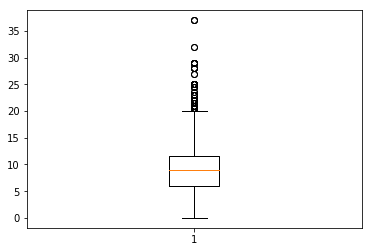

In [24]:
#3.2	Clean data (outliers)

import matplotlib.pyplot as plt

plt.boxplot("meaneduc",data = df32.toPandas())
df32.groupBy('meaneduc').count().show()

In [11]:
import pyspark.sql.functions as F

stats = df32.agg(
    F.stddev_pop(F.col('meaneduc')).alias("m_sd"),
    F.mean(F.col('meaneduc')).alias("m_avg")).first().asDict()
stats

{'m_avg': 9.28637939861466, 'm_sd': 4.1968100597803595}

In [12]:
## Z-score

df32 = df32.withColumn(
    'meaneduc_z', F.abs(df32['meaneduc'] - stats['m_avg'])/stats['m_sd']
               )

In [14]:
import matplotlib.pyplot as plt
df32 = df32.filter('meaneduc_z <= 2')
df32.groupBy('meaneduc').count().show()
plt.boxplot("meaneduc",data = df32.toPandas())

+------------------+-----+
|          meaneduc|count|
+------------------+-----+
|              15.5|  117|
|             14.75|    8|
|               8.0|  298|
|              10.2|    6|
|         5.6666665|   47|
|         3.6666667|   16|
|              8.75|   34|
|              11.4|    6|
|               7.0|  306|
|              11.5|  162|
|               3.5|  108|
|         5.3333335|   38|
|               9.5|  203|
|             10.25|   37|
|              11.6|    5|
|         8.6000004|   18|
|14.333332999999998|   51|
|              12.5|  114|
|               4.5|  154|
|         4.5999999|    7|
+------------------+-----+
only showing top 20 rows



{'boxes': [<matplotlib.lines.Line2D at 0x7f211932e7f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f211933fa20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2119305160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f21192fedd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f211932eb70>,
  <matplotlib.lines.Line2D at 0x7f211933c4a8>]}

In [28]:
print((df32.count(), len(df32.columns)))

(8888, 132)


In [15]:
#3.2	Clean data (errors)

df32.groupBy('edjefe').count().show()

+------+-----+
|edjefe|count|
+------+-----+
|     7|  224|
|    15|  260|
|    11|  731|
|     3|  290|
|     8|  247|
|    16|  126|
|     5|  213|
|    18|   15|
|    17|  171|
|     6| 1809|
|    19|    7|
|     9|  446|
|    no| 3390|
|    20|    7|
|    10|  111|
|   yes|  108|
|     4|  135|
|    12|  111|
|    13|  103|
|    14|  182|
+------+-----+
only showing top 20 rows



In [16]:
from pyspark.sql.functions import *

df32 = df32.withColumn('edjefe', regexp_replace('edjefe', 'yes', '1'))
df32 = df32.withColumn('edjefe', regexp_replace('edjefe', 'no', '0'))
df32.groupBy('edjefe').count().show()


+------+-----+
|edjefe|count|
+------+-----+
|     7|  224|
|    15|  260|
|    11|  731|
|     3|  290|
|     8|  247|
|    16|  126|
|     0| 3390|
|     5|  213|
|    18|   15|
|    17|  171|
|     6| 1809|
|    19|    7|
|     9|  446|
|     1|  108|
|    20|    7|
|    10|  111|
|     4|  135|
|    12|  111|
|    13|  103|
|    14|  182|
+------+-----+
only showing top 20 rows



In [17]:
df32 = df32.withColumn('edjefa', regexp_replace('edjefe', 'yes', '1'))
df32 = df32.withColumn('edjefa', regexp_replace('edjefe', 'no', '0'))
df32.groupBy('edjefa').count().show()

+------+-----+
|edjefa|count|
+------+-----+
|     7|  224|
|    15|  260|
|    11|  731|
|     3|  290|
|     8|  247|
|    16|  126|
|     0| 3390|
|     5|  213|
|    18|   15|
|    17|  171|
|     6| 1809|
|    19|    7|
|     9|  446|
|     1|  108|
|    20|    7|
|    10|  111|
|     4|  135|
|    12|  111|
|    13|  103|
|    14|  182|
+------+-----+
only showing top 20 rows



In [32]:
#3.3	Construct data
df32.groupBy('dependency').count().show()

+----------+-----+
|dependency|count|
+----------+-----+
| .33333334|  570|
|         3|  184|
|         8|  335|
|       2.5|   70|
|         5|   18|
| 1.3333334|   84|
|        .2|   90|
|         6|    7|
| .40000001|   84|
| .66666669|  467|
|       1.5|  657|
|        .5| 1452|
| .16666667|    7|
|        no| 1732|
|       yes| 2057|
|       .25|  250|
|         4|   85|
|       .75|   98|
|         2|  641|
+----------+-----+



In [18]:
df33 = df32.withColumn(
    'dependency_rate', (df32['hogar_nin']+ df32['hogar_mayor'])/df32['hogar_total']
               )

In [34]:
df33.groupBy('dependency_rate').count().show()

+-------------------+-----+
|    dependency_rate|count|
+-------------------+-----+
|                0.0| 1732|
|                0.2|  250|
|                1.0|  335|
| 0.7142857142857143|   70|
| 0.3333333333333333| 1452|
|                0.6|  657|
|                0.8|   85|
|0.16666666666666666|   90|
| 0.8571428571428571|    7|
| 0.6666666666666666|  641|
|                0.5| 2057|
|               0.75|  184|
|                0.4|  467|
| 0.2857142857142857|   84|
| 0.8333333333333334|   18|
|               0.25|  570|
|0.14285714285714285|    7|
|0.42857142857142855|   98|
| 0.5714285714285714|   84|
+-------------------+-----+



In [19]:
import gc
del df32
del stats
gc.collect()

303

In [20]:
#3.4	Integrate various data sources

## New column of target based on parentesco1

target_head = df33.filter(df33.parentesco1== '1').select('idhogar', 'Target')
target_head = target_head.withColumnRenamed("Target", "Target2")
target_head.show(5)

+---------+-------+
|  idhogar|Target2|
+---------+-------+
|21eb7fcc1|      4|
|0e5d7a658|      4|
|2c7317ea8|      4|
|2b58d945f|      4|
|d6dae86b7|      4|
+---------+-------+
only showing top 5 rows



In [37]:
df33.select('idhogar').show(5)

+---------+
|  idhogar|
+---------+
|21eb7fcc1|
|0e5d7a658|
|2c7317ea8|
|2b58d945f|
|2b58d945f|
+---------+
only showing top 5 rows



In [21]:
## add Target 2 to data

df34 = df33.join(target_head, on='idhogar',how='left')

In [22]:
df34.filter(df34.idhogar == '0172ab1d9').select('idhogar','parentesco1', 'Target','Target2').show()

+---------+-----------+------+-------+
|  idhogar|parentesco1|Target|Target2|
+---------+-----------+------+-------+
|0172ab1d9|          0|     3|      3|
|0172ab1d9|          0|     2|      3|
|0172ab1d9|          0|     3|      3|
|0172ab1d9|          1|     3|      3|
|0172ab1d9|          0|     2|      3|
+---------+-----------+------+-------+



In [23]:
#3.5	Format data as required

df35 = df34.na.drop()

In [24]:
## change type to int

df35 = df35.withColumn("edjefe",col("edjefe").cast('Int')).withColumn("edjefa",col("edjefa").cast('Int')).withColumn("Target2",col("Target2").cast('Int'))

In [25]:
## drop useless column
df35 = df35.drop('idhogar','dependency', 'Target')
df35

DataFrame[hacdor: int, rooms: int, hacapo: int, v14a: int, refrig: int, v18q: int, r4h1: int, r4h2: int, r4h3: int, r4m1: int, r4m2: int, r4m3: int, r4t1: int, r4t2: int, r4t3: int, tamhog: int, tamviv: int, escolari: int, hhsize: int, paredblolad: int, paredzocalo: int, paredpreb: int, pareddes: int, paredmad: int, paredzinc: int, paredfibras: int, paredother: int, pisomoscer: int, pisocemento: int, pisoother: int, pisonatur: int, pisonotiene: int, pisomadera: int, techozinc: int, techoentrepiso: int, techocane: int, techootro: int, cielorazo: int, abastaguadentro: int, abastaguafuera: int, abastaguano: int, public: int, planpri: int, noelec: int, coopele: int, sanitario1: int, sanitario2: int, sanitario3: int, sanitario5: int, sanitario6: int, energcocinar1: int, energcocinar2: int, energcocinar3: int, energcocinar4: int, elimbasu1: int, elimbasu2: int, elimbasu3: int, elimbasu4: int, elimbasu5: int, elimbasu6: int, epared1: int, epared2: int, epared3: int, etecho1: int, etecho2: int

In [26]:
df35.toPandas().to_csv('1-3.csv')

In [27]:
del df33
del target_head
del df34
gc.collect()

35